# Time-Series Forecasting

In [1]:
import sys
import os

# Add the scripts folder to the sys.path
sys.path.append(os.path.abspath('E:/Git_repo/time_series_credit_risk/scripts'))

In [2]:
import sys
print(sys.executable)

e:\Git_repo\time_series_credit_risk\myenv\Scripts\python.exe


In [3]:
import pandas as pd
import numpy as np
import pickle

In [4]:
import matplotlib.pyplot as plt

In [5]:
from timeseries_forecasting import load_data, preprocess_data, load_model_file, plot_forecast

In [ ]:
# Load Data
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2025-01-31'
tsla_data = load_data(ticker, start_date, end_date)
tsla_data, scaler = preprocess_data(tsla_data)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
# Load Models
arima_model = load_model_file('e:/Git_repo/time_series_credit_risk/models/arima.pkl', model_type='arima')
sarima_model = load_model_file('e:/Git_repo/time_series_credit_risk/models/sarima.pkl', model_type='sarima')
lstm_model = load_model_file('e:/Git_repo/time_series_credit_risk/models/lstm.h5', model_type='lstm')

In [ ]:
# Forecast using ARIMA and SARIMA
arima_forecast = arima_model.forecast(steps=30)
sarima_forecast = sarima_model.forecast(steps=30)

e:\Git_repo\time_series_credit_risk\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Git_repo\time_series_credit_risk\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
e:\Git_repo\time_series_credit_risk\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


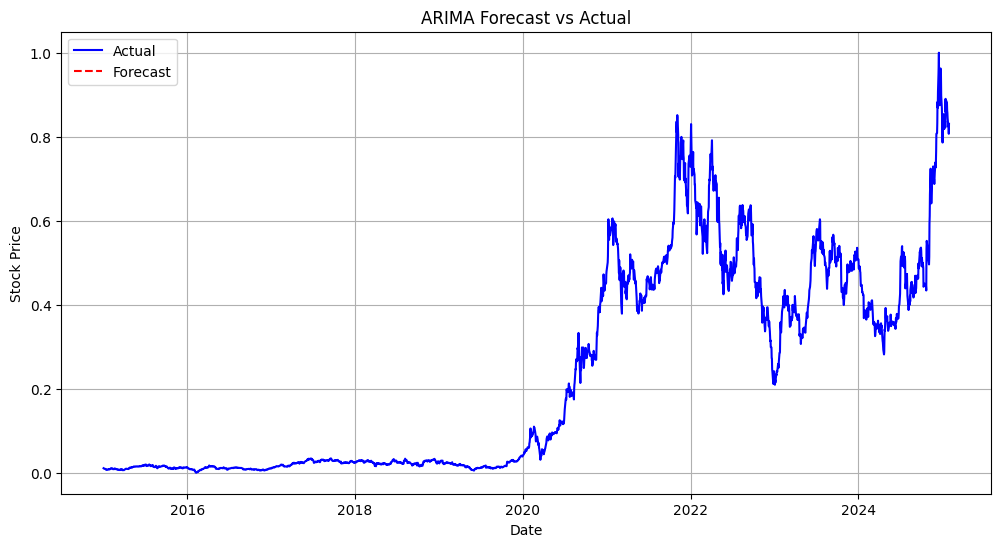

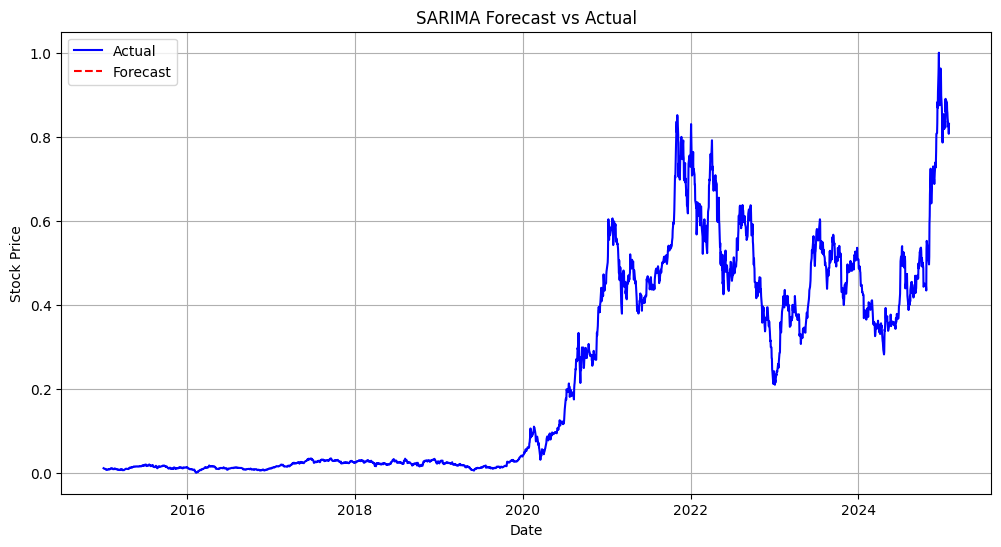

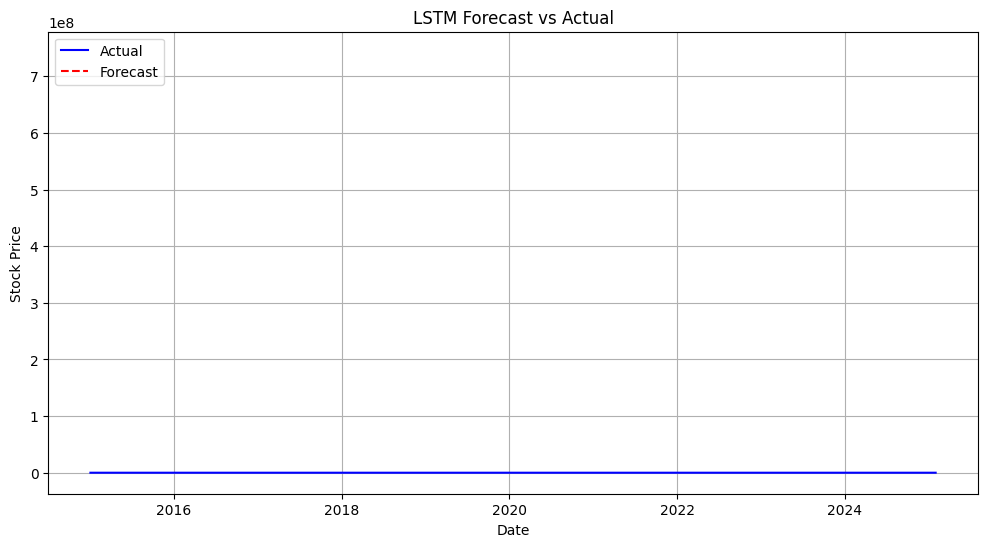

In [ ]:
# Prepare Data for LSTM
last_10_days = tsla_data[-10:]
X_lstm = np.array([last_10_days.values])
lstm_forecast = lstm_model.predict(X_lstm)
lstm_forecast = scaler.inverse_transform(np.concatenate([np.zeros((1,4)), lstm_forecast], axis=1))[:, -1]

# Create Date Index for Forecasts
forecast_dates = pd.date_range(start=tsla_data.index[-1], periods=31, freq='D')[1:]
arima_forecast = pd.Series(arima_forecast, index=forecast_dates)
sarima_forecast = pd.Series(sarima_forecast, index=forecast_dates)
lstm_forecast = pd.Series(lstm_forecast, index=forecast_dates[:1])

# Plot Results
plot_forecast(tsla_data['Close'], arima_forecast, 'ARIMA Forecast vs Actual')
plot_forecast(tsla_data['Close'], sarima_forecast, 'SARIMA Forecast vs Actual')
plot_forecast(tsla_data['Close'], lstm_forecast, 'LSTM Forecast vs Actual')
